In [132]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.6.0


In [133]:
# Loading the DataSet
wafer_data_set = np.load('Wafer_Map_Datasets.npz')
wafer_images = wafer_data_set.f.arr_0
defect_labels = wafer_data_set.f.arr_1 

#Split Data in 80:20 for train:test dataset
X_train, X_test , y_train, y_test = train_test_split(wafer_images, defect_labels, train_size=0.9)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)
print(X_train.shape[1:])
print(wafer_images.shape)

(34213, 52, 52)
(34213, 8)
(3802, 52, 52)
(3802, 8)
(52, 52)
(38015, 52, 52)


In [134]:
# Label Dictionary
label_dict = {}
label_dict[0] = "Center"
label_dict[1] = "Donut"
label_dict[2] = "Edge Loc"
label_dict[3] = "Edge Ring"
label_dict[4] = "Loc"
label_dict[5] = "Near Full"
label_dict[6] = "Scratch"
label_dict[7] = "Random"

defect_priority = {}
defect_priority[0] = "None"
defect_priority[1] = "Medium"
defect_priority[2] = "High"
defect_priority[3] = "Very High"
defect_priority[4] = "Critical"
print(label_dict)
print(defect_priority)

def label_extractor(prediction_vector):
  '''
  Extracts the Label name from the predicted output
  '''
  if sum(prediction_vector) == 0:
    return ["None"], defect_priority[0]

  predicted_label = []
  for i in range(len(prediction_vector)):
    if prediction_vector[i]:
      predicted_label.append(label_dict[i])
  
  return predicted_label, defect_priority[sum(prediction_vector)]

print(label_extractor([0,1,0,0,1,0,0,0]))

{0: 'Center', 1: 'Donut', 2: 'Edge Loc', 3: 'Edge Ring', 4: 'Loc', 5: 'Near Full', 6: 'Scratch', 7: 'Random'}
{0: 'None', 1: 'Medium', 2: 'High', 3: 'Very High', 4: 'Critical'}
(['Donut', 'Loc'], 'High')


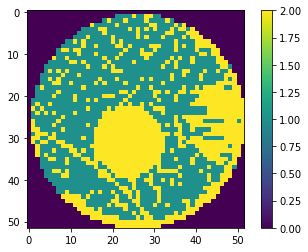

In [135]:
# Data Pre-Processing

## Data has 0-255 pixel value range 
plt.figure()
#plt.imshow(X_train[12001])
plt.imshow(wafer_images[5000])
plt.colorbar()
plt.grid(False)
plt.show()

In [136]:
# Building up the Neural Network

## 1st layer - Flatten/Unstacking: 52x52 -> 1x2704 (No Parameters, only reformatting the data)
## 2nd layer - Dense: 128 nodes/neurons
## 3rd layer - Dense: 8 nodes/neurons for 8 output classes

#model = tf.keras.Sequential([
#    tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    #tf.keras.layers.Dense(512, activation='relu'),
   #tf.keras.layers.Dense(256, activation='elu'),
#    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
#    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
#    tf.keras.layers.Dense(8, activation='sigmoid')
#])

#input_shape_val = (X_train.shape[0], X_train.shape[1], X_train.shape[2])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='sigmoid'))

#Cumpulsory to do this for CNN, Need to add a batch-axis!
#https://stackoverflow.com/questions/66218328/mnist-cnn-valueerror-expected-min-ndim-4-found-ndim-3-full-shape-received-32
X_train = np.expand_dims(X_train, axis=-1)
#print(X_train.shape)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 23, 23, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                495680    
_________________________________________________________________
dense_15 (Dense)             (None, 8)                

In [137]:
# Compiling the model

## Loss Function - Measures accuracy of model training
## Optimizer - How model is updated based on data and Loss function
## Metrics - Monitors training/testing steps (or incorrectly classified)

#model.compile(loss='binary_crossentropy',
#              optimizer=tf.keras.optimizers.Adam(0.0001),
#              metrics = 'accuracy')

#model.compile(loss='binary_crossentropy',
#              optimizer=tf.keras.optimizers.Adam(0.0001))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics = ['accuracy'])


(34213, 52, 52, 1)
(34213, 8)
Epoch 1/10
856/856 [==============================] - 99s 115ms/step - loss: 0.4102 - accuracy: 0.3434 - val_loss: 0.3395 - val_accuracy: 0.5083
Epoch 2/10
856/856 [==============================] - 98s 114ms/step - loss: 0.3027 - accuracy: 0.5965 - val_loss: 0.2778 - val_accuracy: 0.6760
Epoch 3/10
856/856 [==============================] - 98s 115ms/step - loss: 0.2587 - accuracy: 0.6434 - val_loss: 0.2367 - val_accuracy: 0.6635
Epoch 4/10
856/856 [==============================] - 98s 115ms/step - loss: 0.2303 - accuracy: 0.6604 - val_loss: 0.2201 - val_accuracy: 0.6835
Epoch 5/10
856/856 [==============================] - 99s 116ms/step - loss: 0.2055 - accuracy: 0.6594 - val_loss: 0.1933 - val_accuracy: 0.6497
Epoch 6/10
856/856 [==============================] - 99s 115ms/step - loss: 0.1797 - accuracy: 0.6551 - val_loss: 0.1717 - val_accuracy: 0.6423
Epoch 7/10
856/856 [==============================] - 102s 119ms/step - loss: 0.1563 - accuracy: 0.6

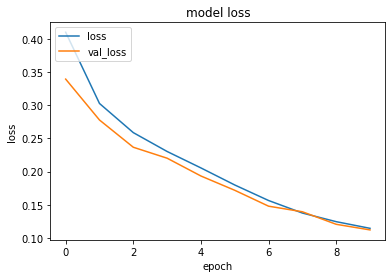

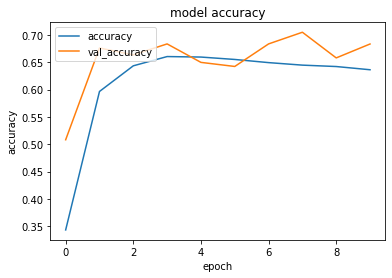

In [138]:
# Train the Neural Network and plot the accuracy
#print(X_train.shape)
#y_train = np.expand_dims(X_train, axis=0)
print(X_train.shape)
print(y_train.shape)
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [139]:
# Accuracy Evaluation
X_test = np.expand_dims(X_test, axis=-1)  #Needed for CNN
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

119/119 - 3s - loss: 0.1127 - accuracy: 0.6623


In [144]:
# Predict an input image using model

## Gives a measure of confidence of each image for each class
predictions = model.predict(X_test)
indices_to_test = [101, 600, 2500]
for i in indices_to_test:
  pred_val = np.round(predictions[i], 1).astype(int)
  #plt.figure()
  #print(X_test[i].shape)
  #plt.imshow(X_test[i])
  #plt.colorbar()
  #plt.grid(False)
  #plt.show()
  #print(pred_val, y_test[i])
  print(f'Predicted = {label_extractor(pred_val)}')
  print(f'Actual = {label_extractor(y_test[i])}')

Predicted = (['Edge Ring'], 'Medium')
Actual = (['Edge Ring'], 'Medium')
Predicted = (['Edge Loc', 'Scratch'], 'High')
Actual = (['Edge Loc', 'Scratch'], 'High')
Predicted = (['Donut', 'Edge Loc', 'Loc'], 'Very High')
Actual = (['Donut', 'Edge Loc', 'Loc', 'Scratch'], 'Critical')
